In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings 

warnings.filterwarnings("ignore")

In [2]:
df = sns.load_dataset('titanic')

In [4]:
df_required = df[["embark_town", "fare"]]

In [6]:
df_required.head()

,embark_town,fare
0,Southampton,7.2500
1,Cherbourg,71.2833
2,Southampton,7.9250
3,Southampton,53.1000
4,Southampton,8.0500


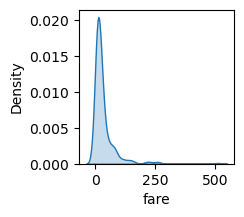

In [43]:
plt.figure(figsize=(2, 2))
sns.kdeplot(df_required["fare"], fill=True)  # Only the KDE curve
plt.show()

In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [10]:
trsf1 = ColumnTransformer(transformers=[
    ("oneHot_Encong", OneHotEncoder(), [0])
], remainder="passthrough")

In [11]:
trsf2 = ColumnTransformer(transformers=[
    ("feature_scaling", StandardScaler(), [1])
], remainder="passthrough")

In [14]:
from sklearn.pipeline import make_pipeline

In [15]:
pipe = make_pipeline(trsf1,trsf2)

In [16]:
pipe

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('oneHot_Encong',
                                                  OneHotEncoder(), [0])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('feature_scaling',
                                                  StandardScaler(), [1])]))])

In [18]:
df_array = pipe.fit_transform(df_required)

In [20]:
df_transform = pd.DataFrame(df_array)

In [35]:
df_transform[2] = df_transform[2].astype(int)

In [36]:
df_transform

,0,1,2,3,4
0,-0.307562,0.0,1,0.0,7.2500
1,-0.307562,1.0,0,0.0,71.2833
2,-0.307562,0.0,1,0.0,7.9250
3,-0.307562,0.0,1,0.0,53.1000
4,-0.307562,0.0,1,0.0,8.0500
...,...,...,...,...,...
886,-0.307562,0.0,1,0.0,13.0000
887,-0.307562,0.0,1,0.0,30.0000
888,-0.307562,0.0,1,0.0,23.4500
889,-0.307562,1.0,0,0.0,30.0000
